In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter 
from PIL import Image

In [21]:
# Import image
lenagray = np.array(Image.open('/Users/shengwan/Desktop/lena512.bmp')) 
m,n  = lenagray.shape

In [22]:
# Dilation
dilate = np.zeros((m,n))
for i in range (2,m-1):
    for j in range(2,n-1):
        tmp = 0
        for k in range(i-2,i+2):
            for l in range(j-2,j+2):
                if lenagray[k][l]+1 > tmp:
                    tmp = lenagray[k][l]+1
        dilate[i][j] = tmp

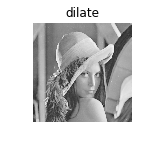

In [23]:
plt.figure()
plt.subplot(212)
plt.imshow(dilate, cmap=plt.cm.gray)
plt.axis('off')
plt.title('dilate')
plt.show()

In [24]:
# erosion
erode = np.zeros((m,n))
for i in range (2,m-1):
    for j in range(2,n-1):
        tmp = 255
        for k in range(i-2,i+2):
            for l in range(j-2,j+2):
                if lenagray[k][l]-1 < tmp and lenagray[k][l] > 0:
                    tmp = lenagray[k][l]-1
        erode[i][j] = tmp

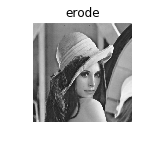

In [27]:
plt.figure()
plt.subplot(212)
plt.imshow(erode, cmap=plt.cm.gray)
plt.axis('off')
plt.title('erode')
plt.show()

In [28]:
# Closing = erode(dilate(img))
closing = np.zeros((m,n))
for i in range (2,m-1):
    for j in range(2,n-1):
        tmp = 255
        for k in range(i-2,i+2):
            for l in range(j-2,j+2):
                if dilate[k][l]-1 < tmp and dilate[k][l] > 0:
                    tmp = dilate[k][l]-1
        closing[i][j] = tmp

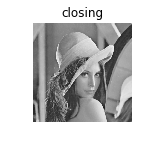

In [29]:
plt.figure()
plt.subplot(212)
plt.imshow(closing, cmap=plt.cm.gray)
plt.axis('off')
plt.title('closing')
plt.show()

In [30]:
# Opening = dilate(erode(img))
opening = np.zeros((m,n))
for i in range (2,m-1):
    for j in range(2,n-1):
        tmp = 0
        for k in range(i-2,i+2):
            for l in range(j-2,j+2):
                if erode[k][l]+1 > tmp:
                    tmp = erode[k][l]+1
        opening[i][j] = tmp

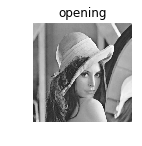

In [31]:
plt.figure()
plt.subplot(212)
plt.imshow(opening, cmap=plt.cm.gray)
plt.axis('off')
plt.title('opening')
plt.show()

In [35]:
dilate_array=Image.fromarray(dilate).convert('L')
dilate_array.save('/Users/shengwan/Desktop/Dilate.jpg')
erode_array=Image.fromarray(erode).convert('L')
erode_array.save('/Users/shengwan/Desktop/Erode.jpg')
closing_array=Image.fromarray(closing).convert('L')
closing_array.save('/Users/shengwan/Desktop/Closing.jpg')
opening_array=Image.fromarray(opening).convert('L')
opening_array.save('/Users/shengwan/Desktop/Opening.jpg')